<a href="https://colab.research.google.com/github/ParichayaHongthongkum/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [3]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas


In [4]:
Name = 'ปริชญา หงส์ทองคำ'
ID = '623020528-4'

In [5]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [6]:
Data = DataGenerator(Name,ID)

020:30:16


In [7]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-10.187117,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964,11.290718,-50.264820
1,8.802957,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808,-19.360529,25.769040
2,4.566708,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315,20.176137,20.181577
3,-1.557750,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722,-11.239992,37.273609
4,9.105714,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226,-21.837186,27.276130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.012739,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069,-11.964788,55.400344
9996,1.971844,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355,18.702787,6.066777
9997,4.313977,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278,15.637518,18.611389
9998,3.029997,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758,-15.500938,-51.618788


In [8]:
Data.shape # ขนาดของข้อมูลที่ได้มา

(10000, 32)

In [9]:
corr = np.corrcoef(Data.to_numpy().T)

In [10]:
corr.shape

(32, 32)

In [11]:
corr

array([[ 1.        , -0.05083607,  0.10638536, ...,  0.27341509,
        -0.05083607,  0.27341509],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.10638536,  0.11548714,  1.        , ..., -0.23673439,
         0.11548714, -0.23673439],
       ...,
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ]])

In [12]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0


In [14]:
datatwo = Data.iloc[:,1:30]
datatwo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964
1,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808
2,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315
3,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722
4,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069
9996,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355
9997,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278
9998,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758


In [15]:
datatwo.shape

(10000, 29)

## **2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**import**

In [23]:
from sklearn.cluster import KMeans

**define**

In [24]:
kmeans = KMeans(n_clusters=4, random_state=2021) 

**fit-transform**

In [25]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

**แสดงจุด cluster centers ที่คำนวณออกมาได้**

In [20]:
kmeans.cluster_centers_

array([[  1.13247584,  -8.98471821,   5.74243783,   5.74692286,
          1.57479407,   0.65327006,  -2.16139838,   1.0659275 ,
         -3.46662618,   0.51778728,   4.97349219,   4.79351653,
          5.34328056,   6.83417247,  -1.6133549 ,   0.10898148,
         -2.91279617,   3.91399258,  -0.36658199,   1.32922292,
         -0.24887875,  -0.33656795,  -4.05376659,  -5.39341288,
         -3.15105153,  -1.42817241,   0.49364093,  -0.75593431,
         -1.94140322,  -8.72784009, -17.96943642, -41.63920045],
       [  2.3892272 ,  -3.5548321 ,  -0.34095539,   4.41661929,
         -1.65436   ,   6.09190915,   4.72665905,  -1.92567101,
         -2.96014842,  -2.10358362,   2.56720858,  -0.44680318,
          1.48083498,   2.83968789,   5.92513848,   1.85145904,
         -0.31335688,   3.09411547,   5.12122765,  -0.42190185,
          0.52112534,   1.99941285,   3.90176196,   1.45698254,
          6.11001787,   0.24083308,  -1.11091121,   0.9351135 ,
         -0.97077744,   7.15549555,  -7

**ทดสอบการจัดกลุ่มด้วย Kmean**

In [21]:
t = kmeans.predict(Data)
t

array([3, 1, 2, ..., 2, 0, 2], dtype=int32)

**ลดDimention**

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [37]:
import matplotlib 

In [38]:
matplotlib.rcParams['figure.figsize']=[9,9]

In [41]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
new_pca = pca.fit_transform(datatwo)

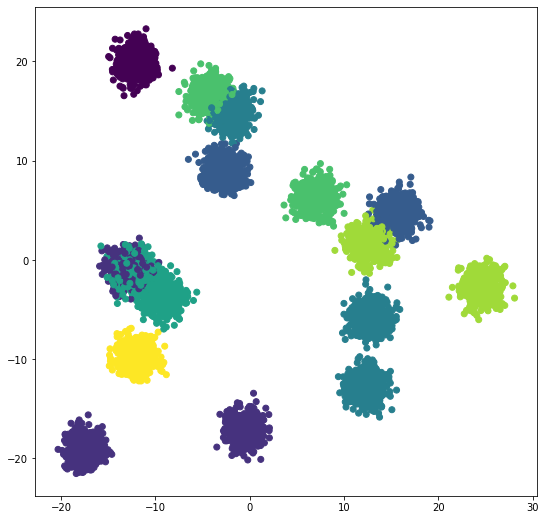

In [42]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
t = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t)

**การหาค่า k ด้วยวิธี The elbow method**

In [43]:
kmeans.inertia_ 

5554355.097216646

In [49]:
SSE = list()
for b in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = b , random_state = 2021)
    BB = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [50]:
SSE

[21892839.273799036,
 12270829.924650874,
 10427484.81555465,
 9248028.122197706,
 8168543.113143556,
 7226154.274885877,
 6180489.370492548,
 5554355.097216646]

จากค่าที่ได้มาทำการ plot กราฟ เพื่อตรวจดูว่ามีทั้งหมดกี่กลุ่ม

In [51]:
matplotlib.rcParams['figure.figsize']=[9,9]

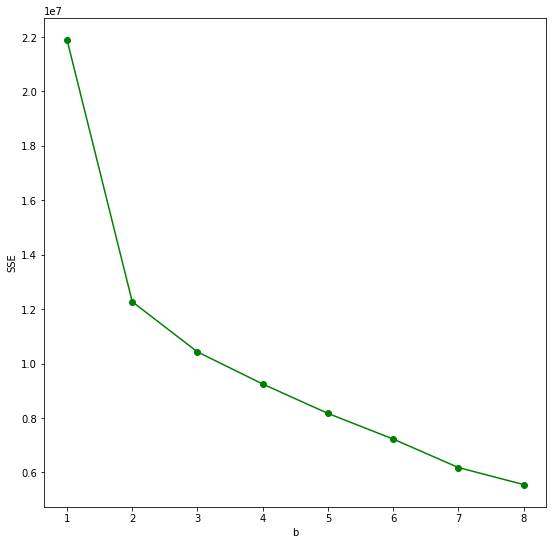

In [55]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-g')
plt.xlabel('b')
plt.ylabel('SSE');

In [56]:
matplotlib.rcParams['figure.figsize']=[9,9]

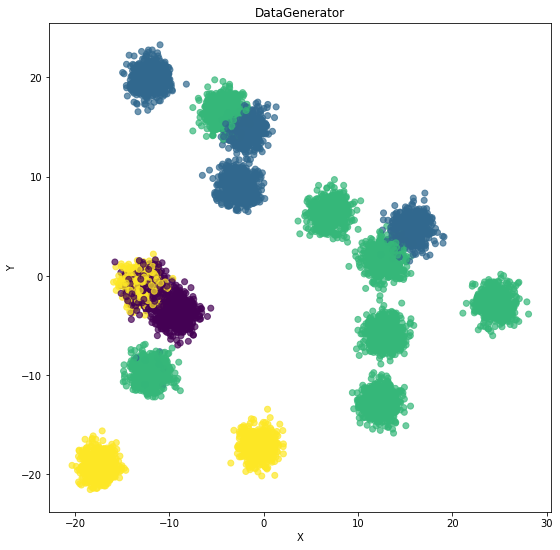

In [57]:
kmeans = KMeans(n_clusters = 4,random_state=2021)
kmeans.fit(Data)
t = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟ หลังจากที่ได้ทำการจัดกลุ่ม k เท่ากับ 4 กลุ่ม

## **3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

**MDS**

**Import**

In [58]:
from sklearn.manifold import MDS

**Define**

In [59]:
mds = MDS(n_components=2)

**Fit transform**

In [60]:
new_mds = mds.fit_transform(Data)

**ทำการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล**

In [61]:
kmeans_23 = KMeans(n_clusters=4,random_state=2021)
kmeans_23.fit(Data)
g = kmeans_23.predict(Data)

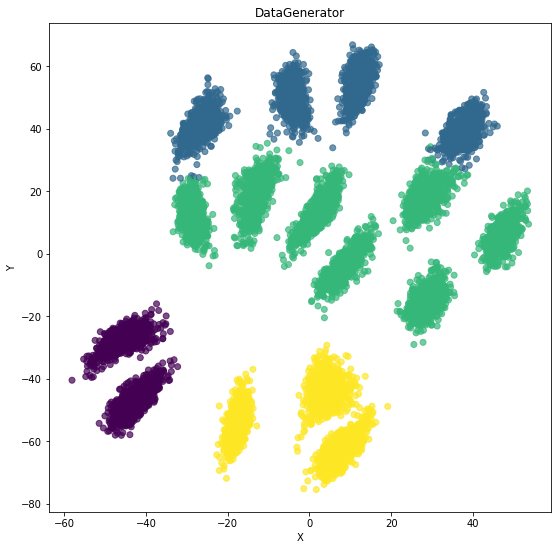

In [62]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

##**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

**กราฟที่ 1 กราฟ PCA**

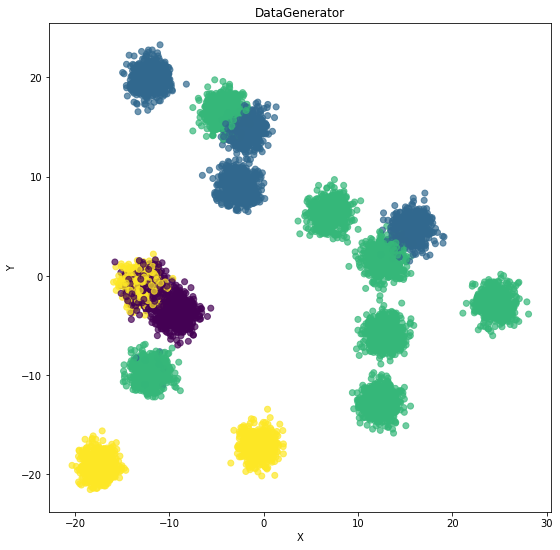

In [63]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**กราฟที่ 2 กราฟ MDS**

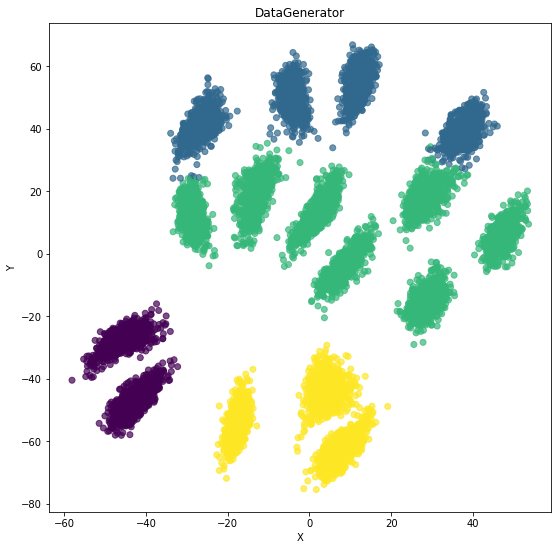

In [64]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟที่ 1 กราฟ PCA และ กราฟที่ 2 กราฟ MDS จะเห็นการกระจายของข้อมูลที่แตกต่างกัน